# Shor's Algorithm Workshop


## Introduction

Shor's algorithm, proposed by Peter Shor in 1994, is a quantum algorithm for integer factorization. Given an integer $N$, it finds its prime factors with polynomial time complexity, which is significantly faster than the best-known classical algorithms that run in super-polynomial time. This efficiency presents a threat to RSA encryption, which relies on the difficulty of factorization.

This workshop introduces the fundamentals of Shor's algorithm, explores its quantum mechanics, and demonstrates its implementation using quantum circuits.


# Modular arithmetic

Consider $ N, a \in \mathbb{N}$ and $ a \lt N$

$ a \mod N$ is the remainder or residue of the quoatient $a/N$

## Examples:


### 1. Basic Modulo Operation

The modulo operation finds the remainder after division of one number by another.

In [ ]:
remainder = 10 % 3
print("10 mod 3 =", remainder)

### 2. Modulo with Negative Numbers

Modulo operations involving negative numbers adhere to the sign of the divisor.

In [ ]:
negative_modulo = -1 % 371  # Remainder when -10 is divided by 3
print("-1 mod 371 =", negative_modulo)

In [ ]:
negative_modulo = 0 % 371  # Remainder when -10 is divided by 3
print("0 mod 371 =", negative_modulo)

## Congruence

We write $a \equiv b \text{ (mod N)}$ si y solo si $(a \mod N) = (b \mod N)$

or equivalently, $a-b= k N$ with k an integer, i.e., $N|(a-b)$, N is a divisor
of $a-b$

### Examples:
$17 \equiv 2 \text{ (mod 15)}$

$534 \equiv 1479 \text{ (mod 15)}$

$3350 \equiv 2237 \text{ (mod 371)}$

### Exercises

Show that:

$1977 \equiv 1 \text{ (mod 247)}$

$16183 \equiv 15442 \text{ (mod 247)}$ 


# Modular exponentiation

Suppose we have a number $N$ and we want to know a factor of $N$. To facilitate
the task of finding factors of $N$ suppose that $N = 2^n$.

Let us randomly choose an integer $a$ that is less than $N$ such that $a$ does
not have common factors with N (apart from 1).

You can test if $a$ and $N$ have common factors using $GCD(a,N)$. If
$GCD(a,N) \neq 1$ we have found a factor of $N$ and we are done.

If $GCD(a,N) = 1$ $a$ and $N$ are called coprimes. If $a$ is coprime with $N$ we
can use $a$ for the nest step oof the algorithm.

We now need to compute the following function:

$f_{a,n}= a^x \mod N$ for al integers between $0$ and $N$ 

## Example
Consider N=15 and a=2

Matplotlib is building the font cache; this may take a moment.


Periodo:  4
      x   = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
 f(x)_a_N = [1 2 4 8 1 2 4 8 1 2 4 8 1 2 4]


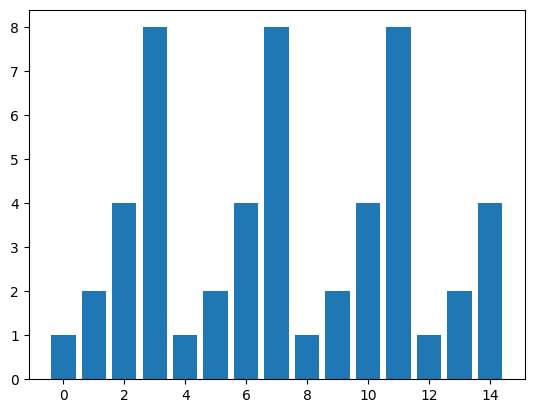

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def powersAModuloN(a,N):
    powers = []
    for i in range(N):
        powers.append(a**i % N)
    return powers

def periodoDeF(a,N):
    powers =powersAModuloN(a,N)
    return powers.index(1,1)


def computeAndDrawPowersAModuloN(a,N):
    powers_a_N = powersAModuloN(a,N)
    print("Periodo: ", periodoDeF(a, N))
    xpoints = np.array(range(N))
    ypoints = np.array(powers_a_N)

    print("      x   =", xpoints)
    print(" f(x)_a_N =", ypoints)
    plt.bar(xpoints, ypoints)
    plt.show()

N = 15
a = 2
computeAndDrawPowersAModuloN(a,N)

In [ ]:
N = 15
a = 4
computeAndDrawPowersAModuloN(a,N)

In [ ]:
N = 15
a = 13
computeAndDrawPowersAModuloN(a,N)

In [ ]:
N = 371
a = 2
computeAndDrawPowersAModuloN(a,N)

## A more efficient way of computing $f_{a,N}(x)$

### Can we compute $fa_{a,N}(x)$ more efficiently?

if $a \equiv a' \text{ (mod N)}$ and $a \equiv b' \text{ (mod N)}$, then

$$a \times b \equiv a' \times b' \text{ (mod N)}$$ 

and

$$ (a \times b) \mod N = ((a \mod N) \times (b\mod N)) \mod N$$

From this we can write:

$$a^x \mod N = a^{x-1} \times a \mod N = ((a^{x-1} \mod N) \times (a \mod N))
\mod N$$

where $a \mod N = a$ because $a < N$, then we can simplify further:

$$f_{a,N}(x)=a^x \mod N = ((a^{x-1} \mod N) \times a) \mod N$$

with 
$$f_{a,N}(0) = a^0 \mod N = 1$$

In [4]:
def powersAModuloNRecursive(a,N):
    powers = []
    powers.append(1)

    for i in range(1, N):
        powers.append((powers[i-1] * a) % N)
    return powers

def computeAndDrawRecursivelyPowersAModuloN(a,N):
    powers_a_N = powersAModuloN(a,N)
    print("Periodo: ", periodoDeF(a, N))
    xpoints = np.array(range(N))
    ypoints = np.array(powers_a_N)

    print("      x   =", xpoints)
    print(" f(x)_a_N =", ypoints)
    plt.bar(xpoints, ypoints)
    plt.show()

In [ ]:
N = 371
a = 24
computeAndDrawRecursivelyPowersAModuloN(a,N)

In [ ]:
N = 371
a = 6
computeAndDrawRecursivelyPowersAModuloN(a,N)

## Finding the period of $f_{a,N}$

What we need is the period of the function, i.e., we need to find the
smallest $r > 0$ such that

$$ f_{a,N}(r) = a^r \mod N = 1$$
we can do this by simple inspection of the figures.

## Example

In [ ]:
N = 371
a = 6

print("Periodo: ", periodoDeF(a, N))

A theorem of number theory says that for any co-prime $a≤ N$, the function
$f_{a, N} will output a 1 for some $r < N$. After this, the sequence of numbers
will repeat. 

If $f_{a, N}(r) = 1$, then

$$ f_{a,N}(x+r) = f_{a,N}(x) $$


## From the Period to factors

We need an even number as period. If the period is not even choose another $a$
and repeat the calculation.

With the information of the period $r$ we can now compute the factors follows:

We know that 

$a^r \equiv 1 \text{ ( mod N)}$

subtract 1 from both sides

$a^r -1 \equiv 0 \text{ ( mod N)}$

Thus, $N$ is a divisor of $a^r -1 $

$ N|(a^r -1)$

We know that $x^2 - y^2 = (x+y)(x-y)$, then we can rewrite

$ N|(\sqrt{a^r} + 1)(\sqrt{a^r} - 1)$

or

$ N|(a^\frac{r}{2} + 1)(a^\frac{r}{2} - 1)$   

Note: If $r$ were odd we could not divide by 2 and get an integer

from this equation we now know that any factor of N is also a factor of $(a^\frac{r}{2} + 1)$
or of $(a^\frac{r}{2} - 1)$ or of both.

So we can find the factors looking at:

$GCD(a^\frac{r}{2} + 1, N)$ 

or

$GCD(a^\frac{r}{2} + 1, N)$

GCD can implement the classical Euclidean algorithm.


**IMPORTANT:** $a^\frac{r}{2} \not\equiv -1 \text{ (mod N)}$ if so choose
another $a$.



## Examples

In [ ]:
def findPeriod(a, N):
    powers = powersAModuloNRecursive(a, N)
    return powers.index(1,1)

def gcd(a, b):
    while b != 0:
        t = b
        b = a % b
        a = t
    return a

if __name__ == '__main__':
    N = 371
    a = 24
    powers_a_N = powersAModuloNRecursive(a,N)
    xpoints = np.array(range(N))
    ypoints = np.array(powers_a_N)

    print("f_a_N=", powers_a_N)
    period = findPeriod(a, N)
    print("period of f_a_N=", period)

    print("a^(period/2) Mod N = ", (a**(period/2)) % N)
    print("(-1) Mod N= ",  (-1) % N)
    print("factor1= ", gcd((a**(period/2)) + 1, N))
    print("factor2= ", gcd((a**(period/2)) - 1, N))

    print((a**(period/2)) +1)
    print("gcd(161,371)=",gcd(161,371))
    print("We can do this because 160 congruent with 24^39")

    plt.bar(xpoints, ypoints)
    plt.show()

## Exercise
Compute the factors of $N=247$ using $a=2$

f_a_N= [1, 2, 4, 8, 16, 32, 64, 128, 9, 18, 36, 72, 144, 41, 82, 164, 81, 162, 77, 154, 61, 122, 244, 241, 235, 223, 199, 151, 55, 110, 220, 193, 139, 31, 62, 124, 1, 2, 4, 8, 16, 32, 64, 128, 9, 18, 36, 72, 144, 41, 82, 164, 81, 162, 77, 154, 61, 122, 244, 241, 235, 223, 199, 151, 55, 110, 220, 193, 139, 31, 62, 124, 1, 2, 4, 8, 16, 32, 64, 128, 9, 18, 36, 72, 144, 41, 82, 164, 81, 162, 77, 154, 61, 122, 244, 241, 235, 223, 199, 151, 55, 110, 220, 193, 139, 31, 62, 124, 1, 2, 4, 8, 16, 32, 64, 128, 9, 18, 36, 72, 144, 41, 82, 164, 81, 162, 77, 154, 61, 122, 244, 241, 235, 223, 199, 151, 55, 110, 220, 193, 139, 31, 62, 124, 1, 2, 4, 8, 16, 32, 64, 128, 9, 18, 36, 72, 144, 41, 82, 164, 81, 162, 77, 154, 61, 122, 244, 241, 235, 223, 199, 151, 55, 110, 220, 193, 139, 31, 62, 124, 1, 2, 4, 8, 16, 32, 64, 128, 9, 18, 36, 72, 144, 41, 82, 164, 81, 162, 77, 154, 61, 122, 244, 241, 235, 223, 199, 151, 55, 110, 220, 193, 139, 31, 62, 124, 1, 2, 4, 8, 16, 32, 64, 128, 9, 18, 36, 72, 144, 41, 82,

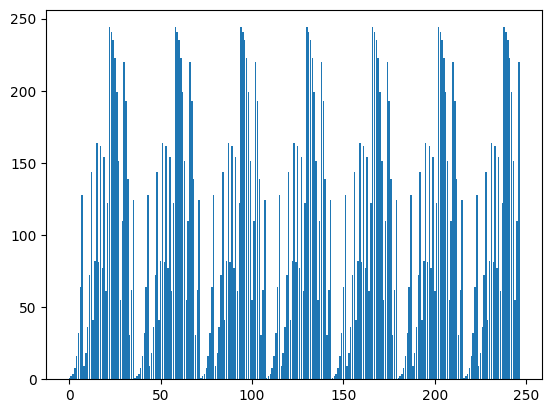

In [5]:
def findPeriod(a, N):
    powers = powersAModuloNRecursive(a, N)
    return powers.index(1,1)

def gcd(a, b):
    while b != 0:
        t = b
        b = a % b
        a = t
    return a

if __name__ == '__main__':
    N = 247
    a = 2
    powers_a_N = powersAModuloNRecursive(a,N)
    xpoints = np.array(range(N))
    ypoints = np.array(powers_a_N)

    print("f_a_N=", powers_a_N)
    period = findPeriod(a, N)
    print("period of f_a_N=", period)

    print("a^(period/2) Mod N = ", (a**(period/2)) % N)
    print("(-1) Mod N= ",  (-1) % N)
    print("factor1= ", gcd((a**(period/2)) + 1, N))
    print("factor2= ", gcd((a**(period/2)) - 1, N))

    print((a**(period/2)) +1)
    print("gcd(161,371)=",gcd(161,371))
    print("We can do this because 160 congruent with 24^39")

    plt.bar(xpoints, ypoints)
    plt.show()

# The quantum algorithm

$a$ is always less than $N$ so we need $n=log_2 N$ qbits as output.

We need to evaluate $f_{a,N}$ in at least $N^2$ values of $x$, so $m = log_2 N^2
= 2 log_2 N = 2n$

![Shor's algorithm!](images/shoralgorithm.jpg)

$\ket{\psi_0} = \ket{\boldsymbol{0_m}, \boldsymbol{0_n}}$

$\ket{\psi_1} = \frac{1}{\sqrt{2^m}}\sum_{x \in \{0,1\}^n} \ket{\boldsymbol{x}, \boldsymbol{0_n}}$

$\ket{\psi_2} = \frac{1}{\sqrt{2^m}} \sum_{x \in \{0,1\}^n} \ket{\boldsymbol{x}, f_{a,N}\boldsymbol{x}}$

$\ket{\psi_2} = \frac{1}{\sqrt{2^m}} \sum_{x \in \{0,1\}^n} \ket{\boldsymbol{x}, a^{\boldsymbol{x}}
\mod N}$

# Shor’s algorithm: 
Input: A positive integer N with n = [log2 N]. 

Output: A factor p of N if it exists. 




In [ ]:
import math
from math import gcd
from random import randint
import sys

def is_prime(n):
    ##Verificar si N es primo o potencia de primo
    if n < 2: return False
    for p in [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31]:
        if n % p == 0: return n == p
    d = n - 1
    s = 0
    while d % 2 == 0:
        d //= 2
        s += 1
    for a in [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31]:
        if a >= n: continue
        x = pow(a, d, n)
        if x == 1 or x == n - 1: continue
        for _ in range(s - 1):
            x = pow(x, 2, n)
            if x == n - 1: break
        else: return False
    return True

def is_prime_power(n):
    """Verifica si n es potencia de primo para el paso 1"""
    if n < 2: return False
    max_k = int(math.log2(n)) + 2
    for k in range(2, max_k):
        root = round(n ** (1/k))
        if pow(root, k) == n and is_prime(root):
            return True
    return False

Step 1. Use a polynomial algorithm to determine if N is prime or a power of
prime. If it is a prime, declare that it is and exit. If it is a power of a
prime number, declare that it is and exit. 

In [ ]:
def shor_step_1(N):
    print("\n=== 1 ===")
    print(f"Verificamos si {N} es primo o potencia de primo")
    
    if is_prime(N):
        print(f"Resultado: {N} es primo. Terminamos algoritmo.")
        sys.exit()
    
    if is_prime_power(N):
        print(f"Resultado: {N} es potencia de primo. Terminamos algoritmo.")
        sys.exit()
    
    print(f"Resultado: {N} no es primo ni potencia de primo. Continuamos al paso 2.")
    return False


Step 2. Randomly choose an integer a such that 1 < a< N. Perform Euclid’s
algorithm to determine GCD(a, N). If the GCD is not 1, then return it and exit. 


In [ ]:
def shor_step_2(N):
    print("\n=== 2 ===")
    print(f"Buscamos un número a coprimo con {N}...")
    
    while True:
        a = randint(2, N-1)
        print(f"Probando a = {a}...")
        g = gcd(a, N)
        
        if g != 1:
            print(f"¡Se encontro factor no es trivial! gcd({a}, {N}) = {g}")
            print(f"Factor encontrado: {g}")
            sys.exit()
        else:
            print(f"a = {a} es coprimo con N = {N}. Continuamos al paso 3.")
            return a


Step 3. Use quantum circuit (6.166) to find a period r.


In [ ]:
def quantum_period_finding(a, N):
    print("\n=== 3 ===")
    print(f"Buscamos el período r de la función f(x) = {a}^x mod {N}")
    
    # En implementación real sería con QFT, aquí simulamos
    for r in range(1, N):
        if pow(a, r, N) == 1:
            print(f"Posible período encontrado: r = {r}")
            print(f"Verificamos: {a}^{r} mod {N} = {pow(a, r, N)}")
            return r
    
    print("No se encontró período. Volvemos al paso 2.")
    return None


Step 4. If r is odd or if ar ≡ −1 Mod N, then return to Step 2 and choose
another a.

In [ ]:
def shor_step_4(a, r, N):
    print("\n=== 4 ===")
    print(f"Verificamos si el período r = {r} es válido")
    
    if r % 2 != 0:
        print(f"r es impar ({r}). No es válido. Volvemoso al paso 2.")
        return False
    
    x = pow(a, r//2, N)
    if x == N - 1:
        print(f"a^(r/2) mod N = {x} ≡ -1 mod {N}. No es válido. Volvemos al paso 2.")
        return False
    
    print(f"Se enontro un periodo valido: r = {r}")
    print(f"a^(r/2) mod N = {x} (no es ≡ -1 mod {N})")
    return True


Step 5. Use Euclid’s algorithm to calculate  and . Return at least one of the nontrivial solutions.


In [ ]:
def shor_step_5(a, r, N):
    print("\n=== 5 ===")
    print("Calculando factores no triviales")
    
    x = pow(a, r//2, N)
    p = gcd(x - 1, N)
    q = gcd(x + 1, N)
    
    print(f"a^(r/2) mod N = {a}^({r//2}) mod {N} = {x}")
    print(f"gcd({x}-1, {N}) = gcd({x-1}, {N}) = {p}")
    print(f"gcd({x}+1, {N}) = gcd({x+1}, {N}) = {q}")
    
    factors = []
    if p not in [1, N]: factors.append(p)
    if q not in [1, N]: factors.append(q)
    
    if factors:
        print(f"¡Factores!: {factors}")
        return factors
    else:
        print("No se encontraron factores no triviales.")
        return None

In [ ]:
def shor_algorithm(N):
    print(f"\nN = {N}")
    print("----------------------------------------")
    
    shor_step_1(N)
    
    while True:
        a = shor_step_2(N)
        
        r = quantum_period_finding(a, N)
        if r is None:
            continue
        
        if not shor_step_4(a, r, N):
            continue
        
        factors = shor_step_5(a, r, N)
        if factors:
            print(f"Los factores de {N} son {factors}")
            return factors

# Ejecutamos con N=6 como ejemplo
if __name__ == "__main__":
    N = 6
    shor_algorithm(N)


INICIANDO ALGORITMO DE SHOR PARA N = 6
----------------------------------------

=== PASO 1 ===
Verificando si 6 es primo o potencia de primo...
Resultado: 6 no es primo ni potencia de primo. Continuando al paso 2.

=== PASO 2 ===
Buscando un número a coprimo con 6...
Probando a = 2...
¡Encontrado factor no trivial! gcd(2, 6) = 2
Factor encontrado: 2


SystemExit: 


## Further Reading

For those interested in diving deeper into Shor's algorithm and quantum computing, here are some resources:

- Yanofsky, Noson S.; Mannucci, Mirco A.. Quantum Computing for Computer Scientists (English Edition) (p. 217). Cambridge University Press. Kindle Edition. 
- Nielsen, M. A., & Chuang, I. L. (2010). Quantum Computation and Quantum Information.
- Kaye, P., Laflamme, R., & Mosca, M. (2007). An Introduction to Quantum Computing.
- [Qiskit Documentation](https://qiskit.org/documentation/)
